In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [15]:
boston = load_boston()

In [17]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [26]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [63]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
boston_data = boston.data

In [35]:
boston_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
#Training a linear regression model

In [36]:
X = boston_data
y = boston['target']

In [38]:
#Train test split

from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
#Creating and training the model

In [43]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression() 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Evaluate the Model

In [46]:
# print the intercept
# the expected mean value of Y when all X=0

print(lm.intercept_)

41.28149654473701


In [47]:
coeff_df = pd.DataFrame(lm.coef_,boston['feature_names'],columns=['Coefficient'])

In [48]:
coeff_df

,Coefficient
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


In [ ]:
'''
Lookint at the coefficents, we see the CHAS(if tract bounds river) variable mostly affects the
home value. Next the number of rooms per house. NOX(nitric oxides concentration)
variable is least contribting to the home valuation.
for e.g.

Holding all other features fixed, a 1 unit increase in CHAS is associated with an increase of $4.13.

'''

In [ ]:
#Model Predictions

In [50]:
predictions = lm.predict(X_test) 

Text(0.5, 1.0, 'Prices vs Predicted prices')

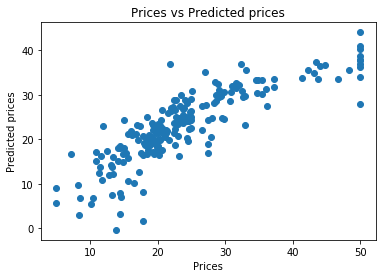

In [62]:
plt.scatter(y_test,predictions)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

In [ ]:
'''
The predictions ar not far from the actual prices, if the result were more in a straight line
the predictions would have been more precise but we can see there is linearity in the plot.
We can always use a different model to see if we can get a better fit.

'''

In [ ]:
#Let us look at the residuals

Text(0.5, 1.0, 'Prices vs Predicted prices')

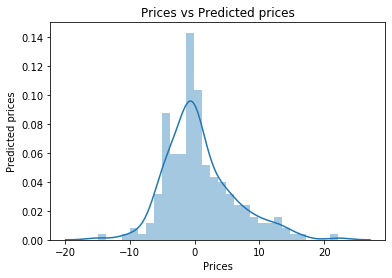

In [61]:
sns.distplot((y_test-predictions),bins=30)


In [ ]:
#This model residuals are distributed equally around zero, with few outliers.
#The residuals are normally distributed so linearity and normality is satisfied.

In [58]:
from sklearn import metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.905144802627506
MSE: 29.416365467452824
RMSE: 5.423685598138301


In [ ]:
'''
The MAE is very low, so the predcited and actual average is not far from each other.
Using MSE to punish larger errors, we still have a good MSE. RMSE which interpitable in the y units,
is very low which is good.
'''
